    WINE QUALITY : PREDICTION OF pH IN WINE

In [ ]:
This notebook tries to find a way to predict the wine pH using Multi Linear Regression.

In [2]:
# importing necessary packages.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')  # to ignore warnings.

In [ ]:
###########################################
###########################################

We are taking winequality dataset available in UCI repository.

In [3]:
red = pd.read_csv('winequality-red.csv', sep=";")
print(red.head(3))  # first three rows of data.
print(red.shape)    # no. of rows and columns.
print(red.columns)  # listing name of all columns.

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
(1599, 12)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


For simplicity let's take continuous numerical variables only. Here we are trying to predict the pH of the wine given other few chemical factors.

The columns taken are: 'fixed acidity','citric acid', 'density', 'free sulfur dioxide', 'total sulfur dioxide','residual sugar', 'chlorides' and 'pH'

Note that 'pH' column is the dependent variable and all others are independent variables.

In [4]:
# Finding correlation between variables.

red1 = red[['fixed acidity','citric acid', 'density',
           'free sulfur dioxide', 'total sulfur dioxide','residual sugar',
            'chlorides','pH' ]]
print(red1.corr())

                      fixed acidity  citric acid   density  \
fixed acidity              1.000000     0.671703  0.668047   
citric acid                0.671703     1.000000  0.364947   
density                    0.668047     0.364947  1.000000   
free sulfur dioxide       -0.153794    -0.060978 -0.021946   
total sulfur dioxide      -0.113181     0.035533  0.071269   
residual sugar             0.114777     0.143577  0.355283   
chlorides                  0.093705     0.203823  0.200632   
pH                        -0.682978    -0.541904 -0.341699   

                      free sulfur dioxide  total sulfur dioxide  \
fixed acidity                   -0.153794             -0.113181   
citric acid                     -0.060978              0.035533   
density                         -0.021946              0.071269   
free sulfur dioxide              1.000000              0.667666   
total sulfur dioxide             0.667666              1.000000   
residual sugar                   0.1870

No two variables taken at a time are too correlated. So, let's move on.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b4e4b3320>,
      dtype=object)

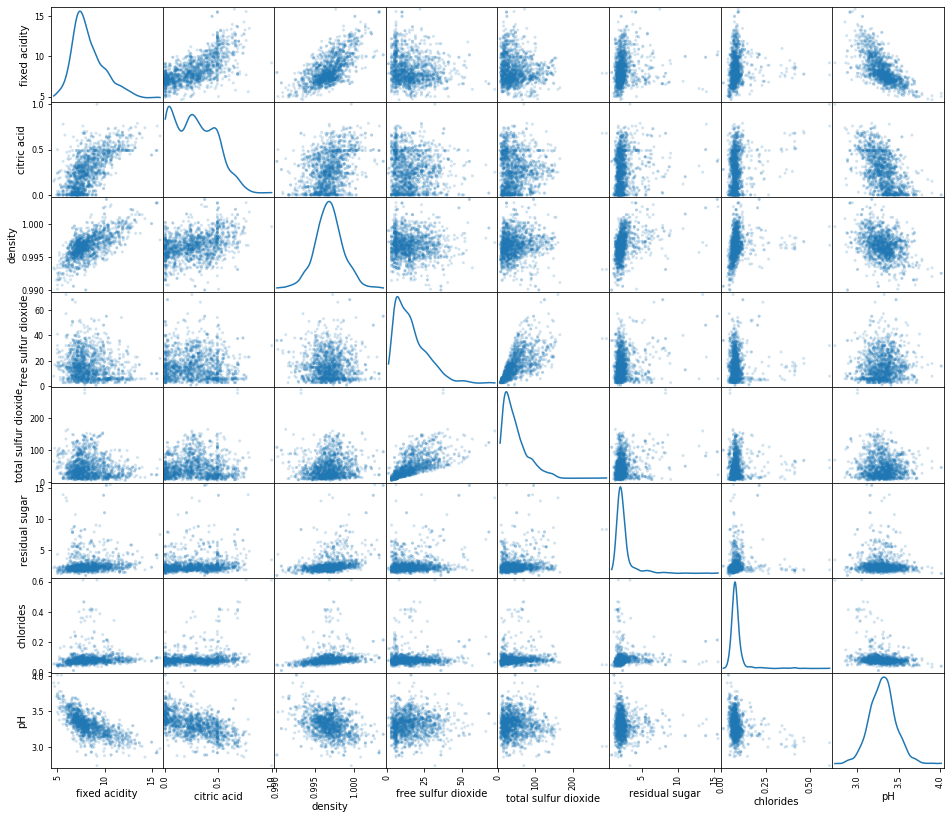

In [5]:
# creating scatter matrix for easy visualization of how each variables behave on each other.
from pandas.plotting import scatter_matrix

scatter_matrix(red1, alpha = 0.2, figsize = (16, 14), diagonal = 'kde')

In [ ]:
# most of the variables, especially citric acid, free sulfur dioxide and total sulfure dioxide are not normaly distributed.
# residual sugar and chlorides are right skewed => check for outliers.

Text(0, 0.5, 'frequency')

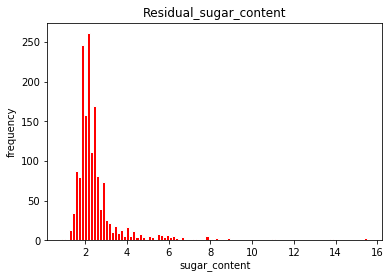

In [6]:
# checking for residual sugar outliers.
# matplotlib histogram
plt.hist(red1['residual sugar'], color = 'red', edgecolor = 'white',bins = 100)

# Add labels
plt.title('Residual_sugar_content')
plt.xlabel('sugar_content')
plt.ylabel('frequency')

In [7]:
# removing values of residual sugar greater than 7.
red1 = red1[red1['residual sugar']<7]

Text(0, 0.5, 'frequency')

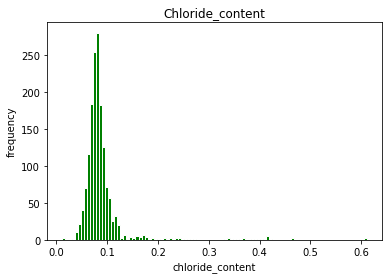

In [8]:
# checking chlorides for outliers.
# matplotlib histogram
plt.hist(red1['chlorides'], color = 'green', edgecolor = 'white',bins = 100)

# Add labels
plt.title('Chloride_content')
plt.xlabel('chloride_content')
plt.ylabel('frequency')


In [9]:
# removing values greater than 0.2
red1 = red1[red1['chlorides'] < 0.2]

523     142.0
188     143.0
771     143.0
219     144.0
189     144.0
772     144.0
14      145.0
201     145.0
637     145.0
636     147.0
1496    147.0
1493    147.0
15      148.0
591     149.0
515     151.0
672     151.0
684     152.0
109     153.0
651     155.0
354     165.0
Name: total sulfur dioxide, dtype: float64


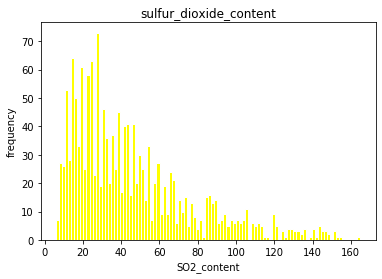

In [10]:
# checking total sufur dioxide for outliers.
# matplotlib histogram
plt.hist(red1['total sulfur dioxide'], color = 'yellow', edgecolor = 'white',bins = 100)

# Add labels
plt.title('sulfur_dioxide_content')
plt.xlabel('SO2_content')
plt.ylabel('frequency')

## knowing values.

print(red1['total sulfur dioxide'].sort_values().tail(20))


In [11]:
# dropping values greater than 150.

red1 = red1[red1['total sulfur dioxide']<150]

497     43.0
1156    45.0
1075    45.0
678     45.0
634     46.0
522     47.0
1175    48.0
1231    48.0
1154    50.0
57      50.0
15      51.0
1295    51.0
1296    51.0
982     51.0
926     52.0
1358    52.0
14      52.0
925     53.0
584     54.0
1131    57.0
Name: free sulfur dioxide, dtype: float64


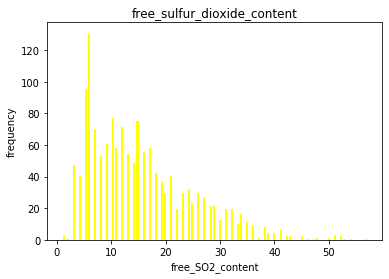

In [12]:
# checking free sufur dioxide for outliers.
# matplotlib histogram
plt.hist(red1['free sulfur dioxide'], color = 'yellow', edgecolor = 'white',bins = 100)

# Add labels
plt.title('free_sulfur_dioxide_content')
plt.xlabel('free_SO2_content')
plt.ylabel('frequency')

## knowing values.

print(red1['free sulfur dioxide'].sort_values().tail(20))


In [13]:
# dropping values greater than 45.

red1 = red1[red1['free sulfur dioxide']<45]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b48fe1eb8>,
      dtype=object)

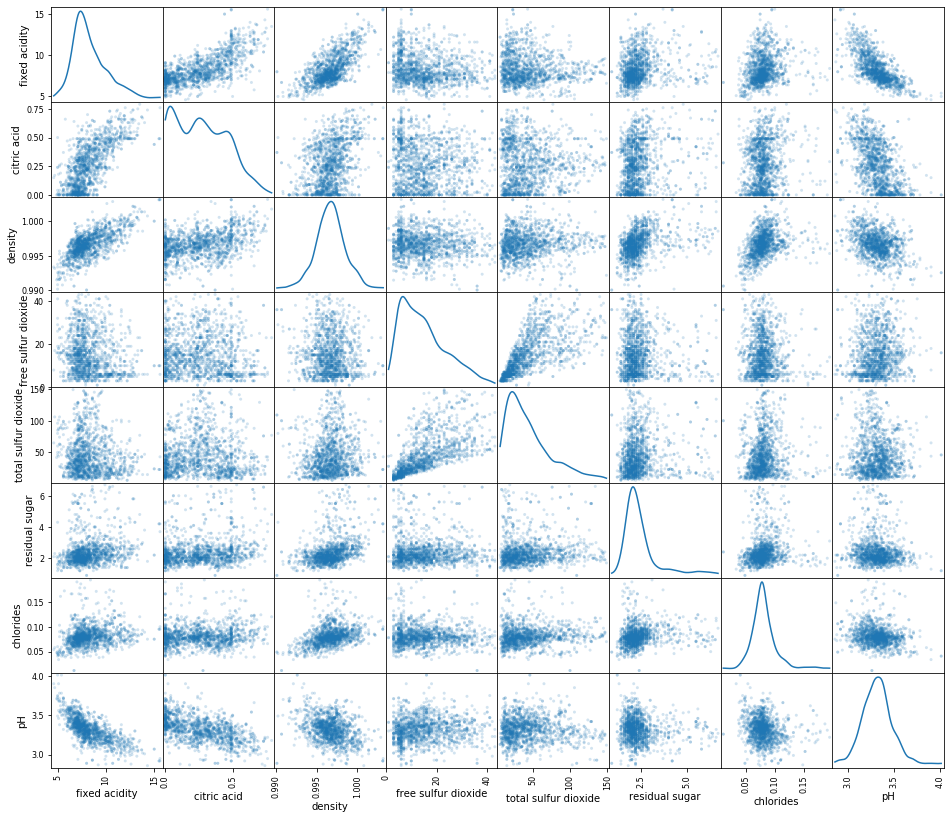

In [14]:
# printing the scatter matrix once again to know the changes.
scatter_matrix(red1, alpha = 0.2, figsize = (16, 14), diagonal = 'kde')

Now we have the distributions more of in a shape of a bell.

In [15]:
red1.head(4)     # printing first four rows.

,fixed acidity,citric acid,density,free sulfur dioxide,total sulfur dioxide,residual sugar,chlorides,pH
0,7.4,0.00,0.9978,11.0,34.0,1.9,0.076,3.51
1,7.8,0.00,0.9968,25.0,67.0,2.6,0.098,3.20
2,7.8,0.04,0.9970,15.0,54.0,2.3,0.092,3.26
3,11.2,0.56,0.9980,17.0,60.0,1.9,0.075,3.16


Now we need to scale the data for better prediction results.

In [16]:
# import package for scaling.
from sklearn.preprocessing import MinMaxScaler

In [17]:
# scaling dataframe.
scaler = MinMaxScaler(feature_range=(0, 1)) # scaling in range (0,1).
red_scal = scaler.fit_transform(red1)
red_scal = pd.DataFrame(red_scal, columns=list(red1.columns))
print(red_scal.head(3))

   fixed acidity  citric acid   density  free sulfur dioxide  \
0       0.254545     0.000000  0.588728             0.238095   
1       0.290909     0.000000  0.512567             0.571429   
2       0.290909     0.050633  0.527799             0.333333   

   total sulfur dioxide  residual sugar  chlorides        pH  
0              0.195804        0.172414   0.351648  0.565217  
1              0.426573        0.293103   0.472527  0.295652  
2              0.335664        0.241379   0.439560  0.347826  


In [18]:
# implementing multiple linear regression.

# setting dependent variable values.
y = pd.DataFrame(red_scal.iloc[:,-1]) # pH is the dependent variable.

# setting independent variable values.
x = pd.DataFrame(red_scal.iloc[:, :-1]) # all except last column are independent variables.

In [19]:
# importing library to divide training and testing data.

from sklearn.model_selection import train_test_split

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state=11)

In [21]:
# viewing the shapes of train and test data.
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1204, 7)
(302, 7)
(1204, 1)
(302, 1)


In [22]:
# import the library for training.
# then train the model.

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# to know the coefficient that the model has choosen.

v = pd.DataFrame(regressor.coef_, index=['Coefficient']).transpose()
w = pd.DataFrame(x.columns, columns=['Attribute'])


In [24]:
# concatenating the dataframe to compare.

coeff_df = pd.concat([w,v],axis = 1, join= 'inner')
print(coeff_df)

              Attribute  Coefficient
0         fixed acidity    -0.811235
1           citric acid     0.011440
2               density     0.358913
3   free sulfur dioxide     0.062608
4  total sulfur dioxide    -0.138234
5        residual sugar    -0.003061
6             chlorides    -0.153765


In [25]:
# comparing the predicted value to the actual value.

ypred = regressor.predict(xtest)
ypred = pd.DataFrame(ypred, columns=['Predicted'])
print(ypred)

     Predicted
0     0.211882
1     0.340564
2     0.457127
3     0.482883
4     0.436544
5     0.269852
6     0.191039
7     0.211864
8     0.530154
9     0.459001
10    0.323194
11    0.299866
12    0.337842
13    0.571179
14    0.571305
15    0.401725
16    0.206851
17    0.300598
18    0.435437
19    0.487549
20    0.476696
21    0.511424
22    0.288142
23    0.324467
24    0.543369
25    0.315716
26    0.481806
27    0.332152
28    0.388350
29    0.306787
..         ...
272   0.175326
273   0.320805
274   0.132263
275   0.286301
276   0.469984
277   0.492324
278   0.464078
279   0.368838
280   0.445595
281   0.326124
282   0.399136
283   0.597976
284   0.494049
285   0.461148
286   0.316603
287   0.363224
288   0.439591
289   0.429926
290   0.181660
291   0.221215
292   0.175279
293   0.416110
294   0.428064
295   0.534209
296   0.311647
297   0.410779
298   0.431663
299   0.501246
300   0.015803
301   0.482343

[302 rows x 1 columns]


In [26]:
# actual values.
print(ytest)

            pH
368   0.278261
864   0.330435
673   0.069565
1305  0.626087
1356  0.452174
348   0.347826
378   0.286957
411   0.173913
1236  1.000000
1406  0.426087
826   0.252174
107   0.304348
904   0.252174
678   0.521739
691   0.521739
214   0.417391
482   0.339130
996   0.286957
971   0.426087
764   0.373913
968   0.443478
1490  0.617391
1228  0.373913
551   0.226087
768   0.652174
897   0.391304
1341  0.478261
908   0.234783
914   0.573913
1165  0.260870
...        ...
878   0.182609
454   0.269565
402   0.121739
83    0.060870
1385  0.452174
1410  0.513043
873   0.513043
397   0.347826
1370  0.478261
442   0.347826
1235  0.347826
1448  0.556522
933   0.513043
985   0.391304
67    0.365217
751   0.408696
25    0.452174
928   0.260870
558   0.121739
998   0.243478
245   0.295652
221   0.400000
658   0.417391
1074  0.652174
184   0.156522
253   0.391304
354   0.304348
1137  0.400000
225   0.182609
1246  0.460870

[302 rows x 1 columns]


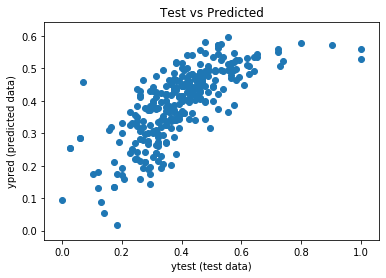

In [27]:
# visualizing test vs predicted.

plt.title("Test vs Predicted")
plt.xlabel("ytest (test data)")
plt.ylabel("ypred (predicted data)")
plt.scatter(ytest, ypred)

The ytest Vs ypred scatterplot has good linearity. 
You can find the correlation between them if you want. 

In [30]:
# evaluating the algorithm quantitatively.

from sklearn import metrics
#import numpy as np

print("mean absolute error: ", metrics.mean_absolute_error(ytest, ypred))
print("mean squared error: ", metrics.mean_squared_error(ytest, ypred))
print("root mean absolute error: ", np.sqrt(metrics.mean_squared_error(ytest, ypred)))


mean absolute error:  0.06954127263556227
mean squared error:  0.00905971768015686
root mean absolute error:  0.09518254924174314


Result:
    
    We have implemented a multiple linear regression successfully for finding the pH of wine with impressive prediction results.

In [ ]:
########### END #######################